<a href="https://colab.research.google.com/github/Sivasankar107/Brainwave-Intern-Work/blob/main/Sales_analysis_(brainwave).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('/content/retail_store_inventory.csv')

In [3]:
df.head()

,Date,Store ID,Product ID,Category,Region,Inventory Level,Units Sold,Units Ordered,Demand Forecast,Price,Discount,Weather Condition,Holiday/Promotion,Competitor Pricing,Seasonality
0,2022-01-01,S001,P0001,Groceries,North,231,127,55,135.47,33.50,20,Rainy,0,29.69,Autumn
1,2022-01-01,S001,P0002,Toys,South,204,150,66,144.04,63.01,20,Sunny,0,66.16,Autumn
2,2022-01-01,S001,P0003,Toys,West,102,65,51,74.02,27.99,10,Sunny,1,31.32,Summer
3,2022-01-01,S001,P0004,Toys,North,469,61,164,62.18,32.72,10,Cloudy,1,34.74,Autumn
4,2022-01-01,S001,P0005,Electronics,East,166,14,135,9.26,73.64,0,Sunny,0,68.95,Summer


In [4]:
df.sample()

,Date,Store ID,Product ID,Category,Region,Inventory Level,Units Sold,Units Ordered,Demand Forecast,Price,Discount,Weather Condition,Holiday/Promotion,Competitor Pricing,Seasonality
65817,2023-10-21,S001,P0018,Clothing,East,445,201,73,220.93,57.06,0,Cloudy,0,53.18,Autumn


In [6]:
df.shape

(73100, 15)

In [7]:
df.tail()

,Date,Store ID,Product ID,Category,Region,Inventory Level,Units Sold,Units Ordered,Demand Forecast,Price,Discount,Weather Condition,Holiday/Promotion,Competitor Pricing,Seasonality
73095,2024-01-01,S005,P0016,Furniture,East,96,8,127,18.46,73.73,20,Snowy,0,72.45,Winter
73096,2024-01-01,S005,P0017,Toys,North,313,51,101,48.43,82.57,10,Cloudy,0,83.78,Autumn
73097,2024-01-01,S005,P0018,Clothing,West,278,36,151,39.65,11.11,10,Rainy,0,10.91,Winter
73098,2024-01-01,S005,P0019,Toys,East,374,264,21,270.52,53.14,20,Rainy,0,55.80,Spring
73099,2024-01-01,S005,P0020,Groceries,East,117,6,165,2.33,78.39,20,Rainy,1,79.52,Spring


In [8]:
df.columns.to_list()

['Date',
 'Store ID',
 'Product ID',
 'Category',
 'Region',
 'Inventory Level',
 'Units Sold',
 'Units Ordered',
 'Demand Forecast',
 'Price',
 'Discount',
 'Weather Condition',
 'Holiday/Promotion',
 'Competitor Pricing',
 'Seasonality']

In [9]:
df['Date'].sort_values(ascending=True)

,Date
0,2022-01-01
72,2022-01-01
71,2022-01-01
70,2022-01-01
69,2022-01-01
...,...
73027,2024-01-01
73026,2024-01-01
73025,2024-01-01
73035,2024-01-01


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73100 entries, 0 to 73099
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Date                73100 non-null  object 
 1   Store ID            73100 non-null  object 
 2   Product ID          73100 non-null  object 
 3   Category            73100 non-null  object 
 4   Region              73100 non-null  object 
 5   Inventory Level     73100 non-null  int64  
 6   Units Sold          73100 non-null  int64  
 7   Units Ordered       73100 non-null  int64  
 8   Demand Forecast     73100 non-null  float64
 9   Price               73100 non-null  float64
 10  Discount            73100 non-null  int64  
 11  Weather Condition   73100 non-null  object 
 12  Holiday/Promotion   73100 non-null  int64  
 13  Competitor Pricing  73100 non-null  float64
 14  Seasonality         73100 non-null  object 
dtypes: float64(3), int64(5), object(7)
memory usage: 8.4+

In [11]:
df.describe()

,Inventory Level,Units Sold,Units Ordered,Demand Forecast,Price,Discount,Holiday/Promotion,Competitor Pricing
count,73100.000000,73100.000000,73100.000000,73100.000000,73100.000000,73100.000000,73100.000000,73100.000000
mean,274.469877,136.464870,110.004473,141.494720,55.135108,10.009508,0.497305,55.146077
std,129.949514,108.919406,52.277448,109.254076,26.021945,7.083746,0.499996,26.191408
min,50.000000,0.000000,20.000000,-9.990000,10.000000,0.000000,0.000000,5.030000
25%,162.000000,49.000000,65.000000,53.670000,32.650000,5.000000,0.000000,32.680000
50%,273.000000,107.000000,110.000000,113.015000,55.050000,10.000000,0.000000,55.010000
75%,387.000000,203.000000,155.000000,208.052500,77.860000,15.000000,1.000000,77.820000
max,500.000000,499.000000,200.000000,518.550000,100.000000,20.000000,1.000000,104.940000


In [12]:
df.isna().sum()

,0
Date,0
Store ID,0
Product ID,0
Category,0
Region,0
Inventory Level,0
Units Sold,0
Units Ordered,0
Demand Forecast,0
Price,0


In [13]:
df.corr(numeric_only=True)

,Inventory Level,Units Sold,Units Ordered,Demand Forecast,Price,Discount,Holiday/Promotion,Competitor Pricing
Inventory Level,1.000000,0.589995,0.001060,0.588561,0.009140,0.004889,0.003411,0.009365
Units Sold,0.589995,1.000000,-0.000930,0.996853,0.001082,0.002576,-0.000374,0.001259
Units Ordered,0.001060,-0.000930,1.000000,-0.001102,0.004212,-0.000938,0.005446,0.004596
Demand Forecast,0.588561,0.996853,-0.001102,1.000000,0.000675,0.002338,-0.000526,0.000844
Price,0.009140,0.001082,0.004212,0.000675,1.000000,0.001509,0.002309,0.993900
Discount,0.004889,0.002576,-0.000938,0.002338,0.001509,1.000000,-0.000852,0.001958
Holiday/Promotion,0.003411,-0.000374,0.005446,-0.000526,0.002309,-0.000852,1.000000,0.001890
Competitor Pricing,0.009365,0.001259,0.004596,0.000844,0.993900,0.001958,0.001890,1.000000


In [14]:
df['Date'].head()

,Date
0,2022-01-01
1,2022-01-01
2,2022-01-01
3,2022-01-01
4,2022-01-01


In [16]:
df_Region = df.groupby(['Region'],as_index=False)['Units Sold'].value_counts()
df_Region

,Region,Units Sold,count
0,East,4,113
1,East,35,111
2,East,41,111
3,East,31,110
4,East,2,107
...,...,...,...
1944,West,482,1
1945,West,486,1
1946,West,488,1
1947,West,495,1


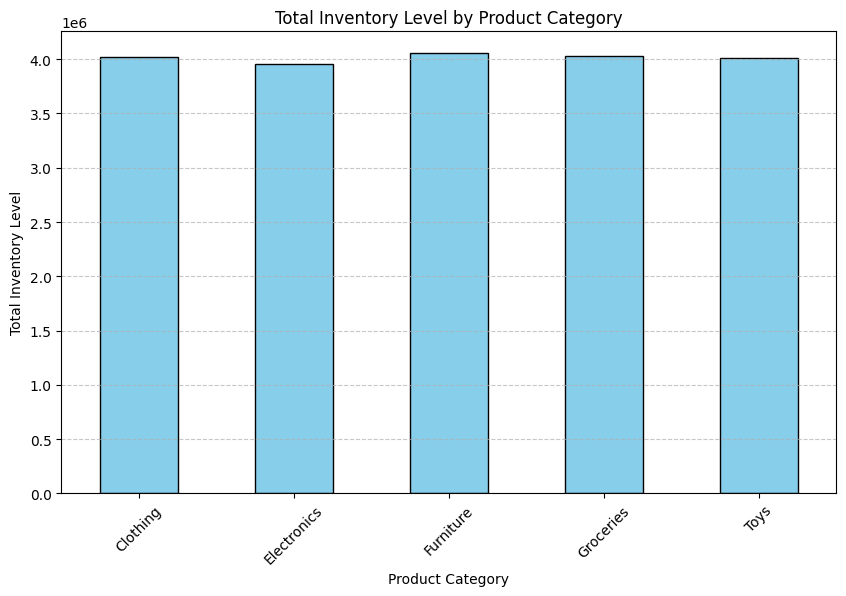

In [19]:
import pandas as pd
import matplotlib.pyplot as plt


file_path = "/content/retail_store_inventory.csv"
df = pd.read_csv(file_path)

category_inventory = df.groupby("Category")["Inventory Level"].sum()

plt.figure(figsize=(10, 6))
category_inventory.plot(kind='bar', color='skyblue', edgecolor='black')
plt.xlabel("Product Category")
plt.ylabel("Total Inventory Level")
plt.title("Total Inventory Level by Product Category")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

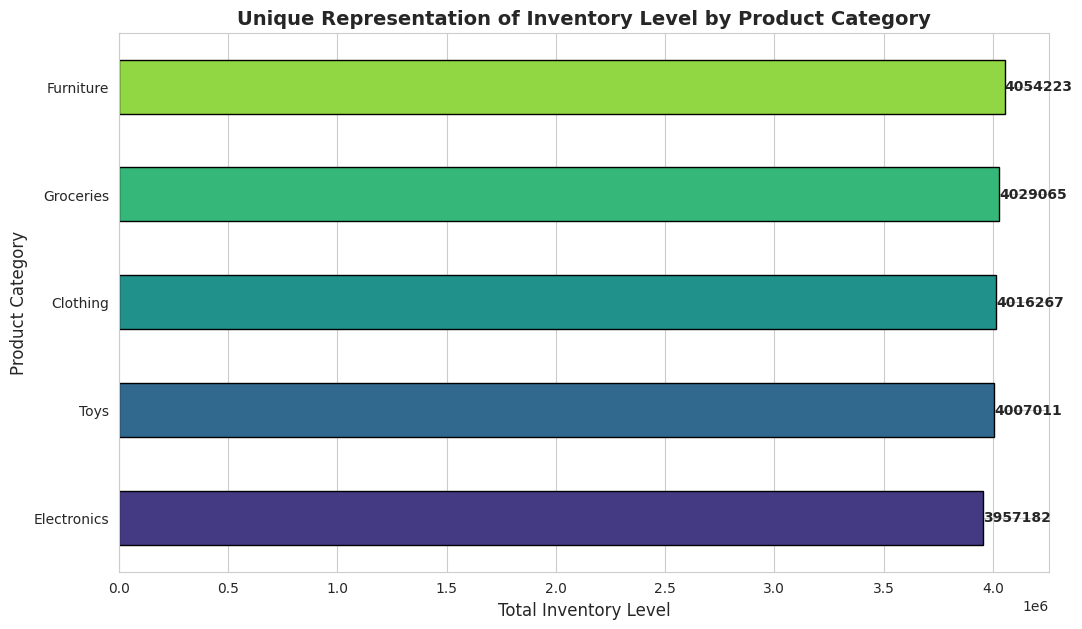

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
file_path = "/content/retail_store_inventory.csv"
df = pd.read_csv(file_path)
category_inventory = df.groupby("Category")["Inventory Level"].sum()
sns.set_style("whitegrid")
plt.figure(figsize=(12, 7))
colors = sns.color_palette("viridis", len(category_inventory))
category_inventory.sort_values().plot(kind='barh', color=colors, edgecolor='black')

plt.xlabel("Total Inventory Level", fontsize=12)
plt.ylabel("Product Category", fontsize=12)
plt.title("Unique Representation of Inventory Level by Product Category", fontsize=14, fontweight='bold')
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
for index, value in enumerate(category_inventory.sort_values()):
    plt.text(value + 5, index, str(value), va='center', fontsize=10, fontweight='bold')
plt.show()
